In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('tweets.csv')
df = pd.DataFrame(data)

In [3]:
df.columns

Index(['Número de Tweet', 'Usuario', 'Texto', 'Creado en', 'Retweets',
       'Likes'],
      dtype='object')

In [4]:
df.rename(columns={'Número de Tweet': 'num_tweets', 'Usuario':'usuario', 'Texto' : 'texto', 'Creado en' : 'creado_en', 'Retweets' : 'retweets', 'Likes':'likes'}, inplace=True)

In [5]:
df.head()

,num_tweets,usuario,texto,creado_en,retweets,likes
0,1,elonmusk,@jgebbia Yeah,2024-11-21 19:19:37+00:00,4,81
1,2,elonmusk,@jgebbia It was next-level insane of Germany t...,2024-11-21 19:03:05+00:00,40,391
2,3,elonmusk,More Starlinks in orbit https://t.co/TR75BVgk0r,2024-11-21 18:58:12+00:00,993,9169
3,4,elonmusk,@rookisaacman Yeah,2024-11-21 18:56:57+00:00,20,318
4,5,elonmusk,@NASASpaceflight If engine failures are isolat...,2024-11-21 18:37:59+00:00,64,799


Calculemos la media de los likes y retweets de los ultimo 100 tweets de Elon Musk

In [6]:
df.describe()

,num_tweets,retweets,likes
count,100.000000,100.00000,100.000000
mean,50.500000,4773.81000,37356.530000
std,29.011492,8786.50883,64294.885934
min,1.000000,4.00000,81.000000
25%,25.750000,48.25000,795.500000
50%,50.500000,215.00000,2761.000000
75%,75.250000,5981.25000,47120.000000
max,100.000000,39984.00000,257832.000000


In [7]:
df['creado_en'] = pd.to_datetime(df['creado_en'])
df['hora'] = df['creado_en'].dt.time

In [8]:
df.head()

,num_tweets,usuario,texto,creado_en,retweets,likes,hora
0,1,elonmusk,@jgebbia Yeah,2024-11-21 19:19:37+00:00,4,81,19:19:37
1,2,elonmusk,@jgebbia It was next-level insane of Germany t...,2024-11-21 19:03:05+00:00,40,391,19:03:05
2,3,elonmusk,More Starlinks in orbit https://t.co/TR75BVgk0r,2024-11-21 18:58:12+00:00,993,9169,18:58:12
3,4,elonmusk,@rookisaacman Yeah,2024-11-21 18:56:57+00:00,20,318,18:56:57
4,5,elonmusk,@NASASpaceflight If engine failures are isolat...,2024-11-21 18:37:59+00:00,64,799,18:37:59


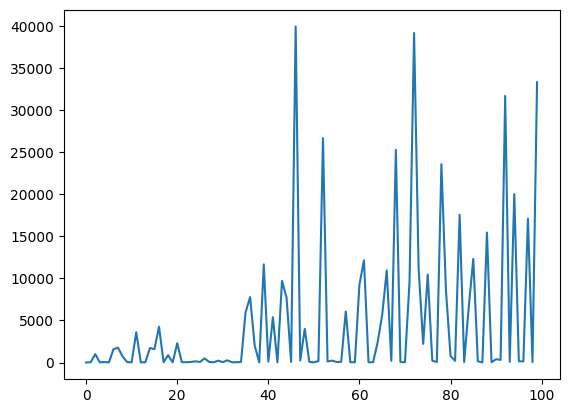

In [9]:
plt.plot(df.retweets)
plt.show()

Como es de esperar, los tweets mas recientes son los que menos cantidad de
retweets tiene. Analicemos a que hora es cuando mas retweets recibe.

C:\Users\dimeg\AppData\Local\Temp\ipykernel_10488\2932857282.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['rango_hora'] = df['creado_en'].dt.floor('H').dt.strftime('%H:00-%H:59')


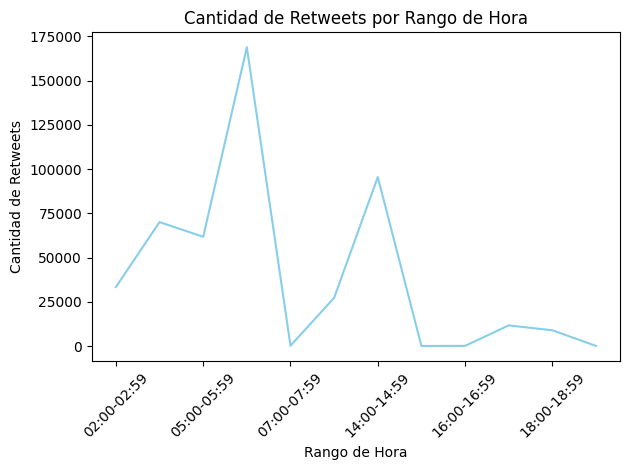

In [10]:
df['rango_hora'] = df['creado_en'].dt.floor('H').dt.strftime('%H:00-%H:59')
serie_tiempo = df.groupby('rango_hora')['retweets'].sum()
serie_tiempo.plot(color='skyblue', title='Cantidad de Retweets por Rango de Hora', ylabel='Cantidad de Retweets', xlabel='Rango de Hora')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.tight_layout()  # Ajustar diseño
plt.show()

El grafico muestra los retweets a lo largo del tiempo, donde podemos observar que entre las 5 y 7 am en uso horario UTC, lo que seria de 11 a 13 en Texas (donde actualmente reside Elon Musk) se presenta el mayor movimiento de retweets. 

Notamos que los tweets mas antiguos son los que mas retweets reciben aunque existe algunos valores atipicos. Esto puede ser por el tiempo en si de las personas que usan X o por el contenido directo del tweet.

Todo lo anterior es medio aburrido y obvio, vayamos a cosas mas especificos ahora,

In [11]:
import re
# Extraer todas las menciones de usuarios usando regex
df['menciones'] = df['texto'].apply(lambda x: re.findall(r'@\w+', x))

# Aplanar la lista de menciones y contar las apariciones
todas_las_menciones = [mencion for sublista in df['menciones'] for mencion in sublista]
conteo_menciones = pd.Series(todas_las_menciones).value_counts()

# Obtener los 10 usuarios más mencionados
top_10_usuarios = conteo_menciones.head(10)

print(top_10_usuarios)

@Rothmus            6
@cb_doge            3
@realDonaldTrump    3
@alx                3
@farzyness          2
@ZachWarunek        2
@alifarhat79        2
@jgebbia            2
@TheGregYang        2
@512x512            2
Name: count, dtype: int64


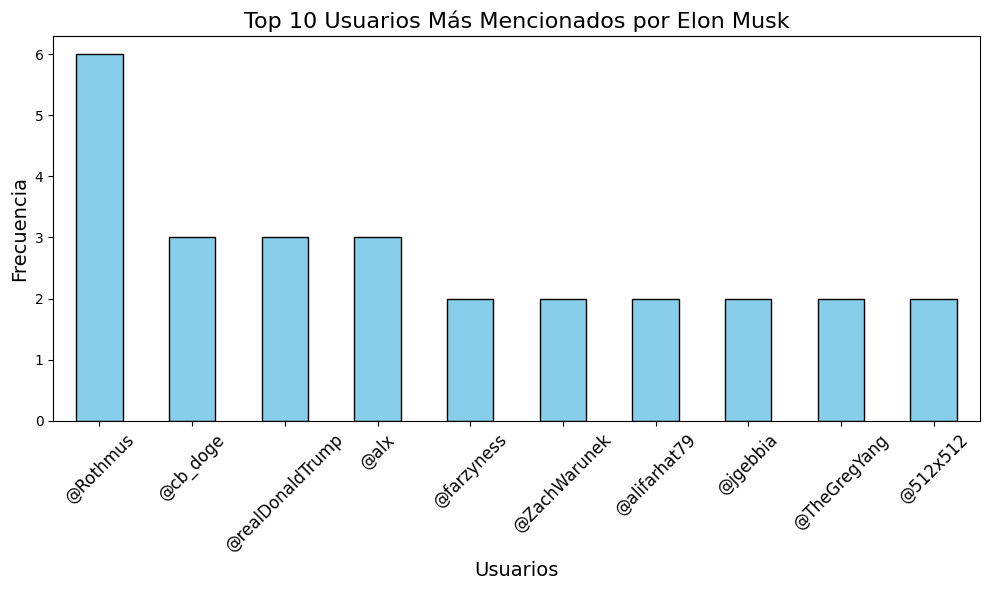

In [12]:
# Crear el gráfico de barras de los usuarios mas menciona por elon

plt.figure(figsize=(10, 6))
top_10_usuarios.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Usuarios Más Mencionados por Elon Musk', fontsize=16)
plt.xlabel('Usuarios', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

Gracias a este grafico, podemos llegar a la conclusion de que Elon Musk no solo es una persona muy activa en X, sino que tambien interactua con varios personas sin importar quienes sean, excepto por el recientemente electo presidente de los Estados Unidos, Donald Trump, a quien apoyo en campania. 

Observamos que Elon tiende a responder a personas con nombres reconocidos, como Trump y Rothmus, lo que podría indicar un enfoque hacia interacciones con figuras publicas o usuarios influyentes.

In [13]:
import pandas as pd
from collections import Counter
import re
import nltk
# nltk.download('stopwords') Activa solo por primera vez
from nltk.corpus import stopwords

# Unir todos los textos sin modificar la columna original
textos = df['texto'].dropna().tolist()
texto_unido = ' '.join(textos)

# Procesamiento del texto
texto_unido = texto_unido.lower()
texto_unido = re.sub(r'[^\w\s]', '', texto_unido)

# Eliminar stop words en ingles
stop_words = set(stopwords.words('english'))
palanbras = [word for word in texto_unido.split() if word not in stop_words]

# Contar la frecuencia de las palabras
contadorpalabras = Counter(palanbras)
palabra_mas_frecuente = contadorpalabras.most_common(1)
print(f"La palabra mas frecuente es '{palabra_mas_frecuente[0][0]}' con {palabra_mas_frecuente[0][1]} repeticiones.")


La palabra mas frecuente es 'yeah' con 14 repeticiones.


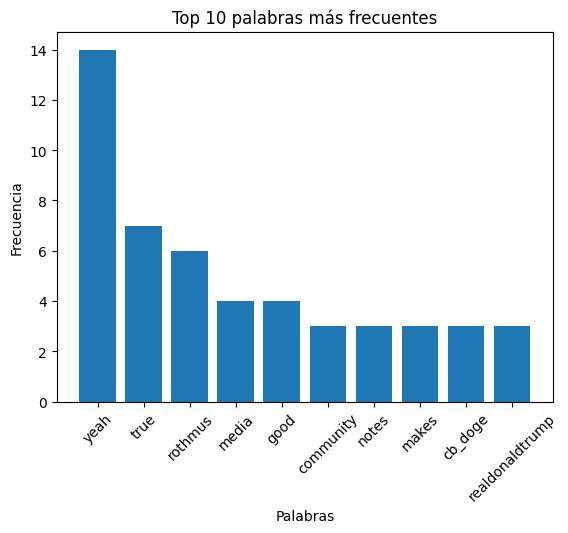

In [14]:
palabras_comunes = contadorpalabras.most_common(10)
palabras_top, frecuencias_top = zip(*palabras_comunes)

# Graficar
plt.bar(palabras_top, frecuencias_top)
plt.xticks(rotation=45)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 palabras más frecuentes')
plt.show()

El grafico presente las palabras mas frecuentadas por Elon, ademas de las menciones. "Yeah" es la palabra mas utilizada, con un total de 14 veces en estos 100 tweets.

In [15]:
df.columns

Index(['num_tweets', 'usuario', 'texto', 'creado_en', 'retweets', 'likes',
       'hora', 'rango_hora', 'menciones'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

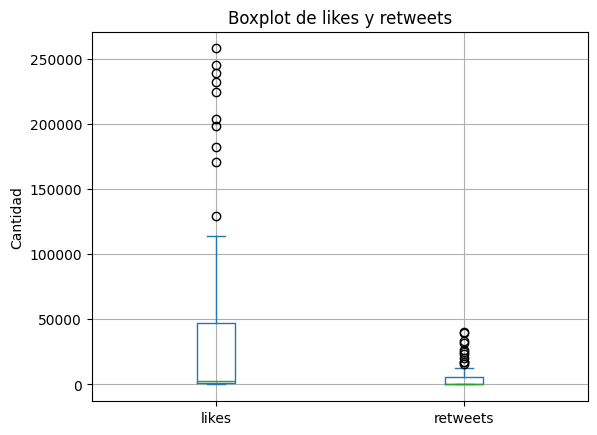

In [18]:
plt.figure(figsize=(10,6))
df[['likes', 'retweets']].plot(kind='box')
plt.title('Boxplot de likes y retweets')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()

Podemos observar que la distribucion de likes esta concentrada en menos de 50.000 presentando valores atipicos de hasta mas de 250.000, esto se debe a que varios de los tweets de Elon son respuestas a otros o estuvieron un menor periodo de tiempo en la plataforma (los mas recientes) por lo que cuentan con una menor cantidad de likes, mientras que los valores atipicos serian los tweets propios de ELon, los "principales". 
En cuanto a lo retweets, podemos observar que hay menos variacion, presentandose concentrados en menos de 10.000, con valores atipicos de casi 50.000 retweets.

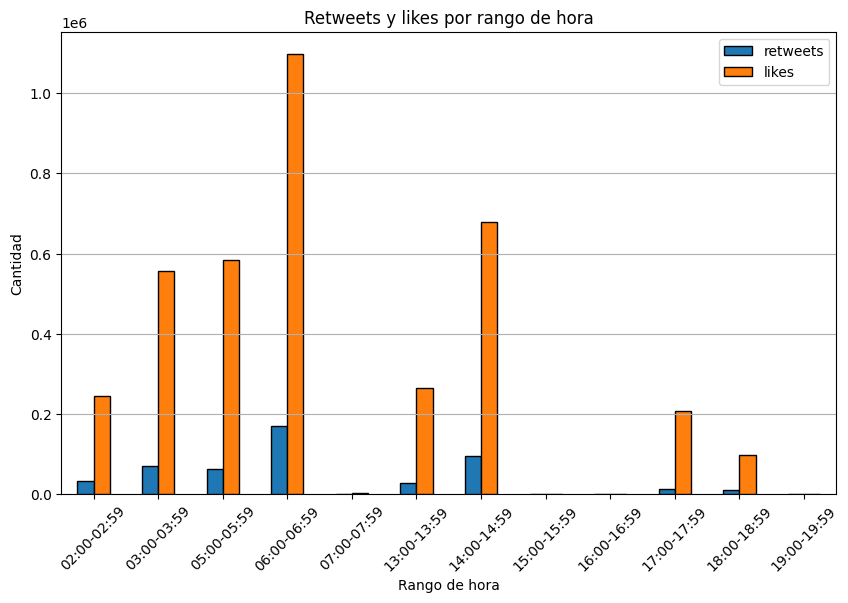

In [19]:
engagement_por_rango_hora = df.groupby('rango_hora')[['retweets', 'likes']].sum()
engagement_por_rango_hora.plot(kind='bar', figsize=(10,6), edgecolor='black')
plt.xlabel('Rango de hora')
plt.ylabel('Cantidad')
plt.title('Retweets y likes por rango de hora')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Como presentamos anteriormente, el rango horario en el que la cuenta de Elon presenta mas movimiento es de 5 a 7 am (11 a 13 horario de Texas), por lo que es de esperar que tambien se presente la mayor cantidad de likes. 